In [119]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas as gpd # Spatial data manipulation
import pandas  # Tabular data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import warnings
# Suppress FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)
from splot import esda as esdaplot
import contextily  # Background tiles
from scipy.stats import zscore
from sklearn.decomposition import PCA


In [120]:
#leer shapefile
gdf = gpd.read_file("/Users/santi/Desktop/Shape/gdf.shp")

#Proyección mercator esférica
gdf = gdf.to_crs(epsg=3857)

#Filtrar x año 2022 y quedarme con columnas importantes
gdf = gdf[gdf["ANIO"] == 2022].reset_index(drop=True)
gdf = gdf[["BARRIOS","ANIO","permisadas","SUP_CONST","geometry"]]

#Z scoreargdf["Z_permisadas"] = zscore(gdf["permisadas"], nan_policy="omit")
gdf["Z_sup_const"] = zscore(gdf["SUP_CONST"], nan_policy="omit")

#Aplicar PCA
pca = PCA(n_components=1)
components = pca.fit_transform(gdf[["Z_permisadas","Z_sup_const"]])
gdf["indice"] = components

gdf

,BARRIOS,ANIO,permisadas,SUP_CONST,geometry,Z_permisadas,Z_sup_const,indice
0,AGRONOMIA,2022,7,13857.77,"POLYGON ((-6509642.739 -4108994.113, -6509727....",-0.683540,-0.422689,-0.782222
1,ALMAGRO,2022,20,47898.97,"POLYGON ((-6502490.948 -4111563.952, -6502484....",-0.047837,-0.023113,-0.050169
2,BALVANERA,2022,13,38653.89,"POLYGON ((-6502385.058 -4109384.676, -6502204....",-0.390138,-0.131632,-0.368947
3,BARRACAS,2022,5,6418.77,"POLYGON ((-6497756.011 -4114108.448, -6497749....",-0.781340,-0.510008,-0.913121
4,BELGRANO,2022,63,178180.80,"POLYGON ((-6506687.345 -4100950.176, -6506697....",2.054871,1.506137,2.518013
5,BOCA,2022,1,1025.41,"POLYGON ((-6495969.658 -4113682.010, -6495967....",-0.976941,-0.573316,-1.096197
6,BOEDO,2022,15,22200.58,"POLYGON ((-6502369.530 -4113760.758, -6502369....",-0.292338,-0.324761,-0.436355
7,CABALLITO,2022,40,86246.03,"POLYGON ((-6504465.288 -4110607.810, -6504460....",0.930167,0.427005,0.959665
8,CHACARITA,2022,17,34429.92,"POLYGON ((-6506938.163 -4109112.260, -6507031....",-0.194538,-0.181213,-0.265696
9,COGHLAN,2022,15,18014.33,"POLYGON ((-6509120.077 -4105070.784, -6509179....",-0.292338,-0.373900,-0.471101


In [121]:
#Criterio análisis
criteria = "indice"

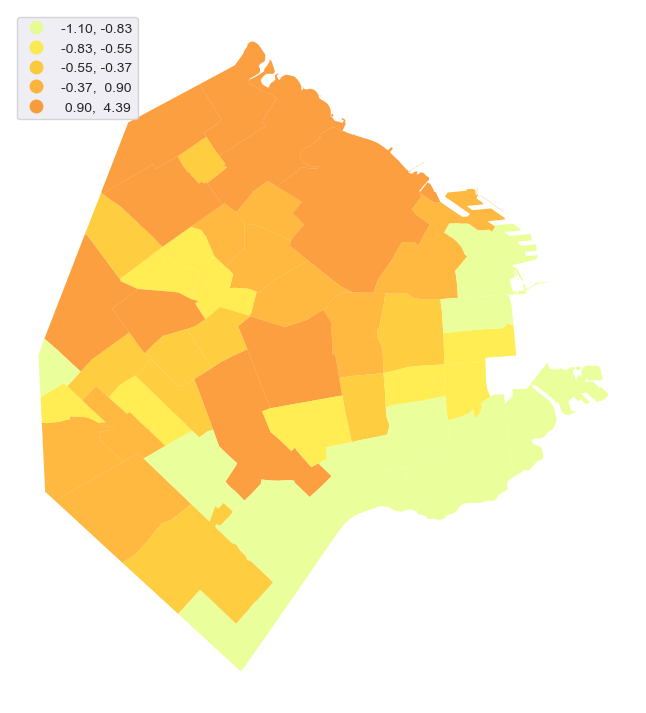

In [122]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
gdf.plot(
    column=criteria,
    cmap="Wistia",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

"""# Add basemap
contextily.add_basemap(
    ax,
    crs=gdf.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)"""
# Remove axes
ax.set_axis_off();

In [123]:
w = weights.contiguity.Queen.from_dataframe(gdf)
w.transform = "R"

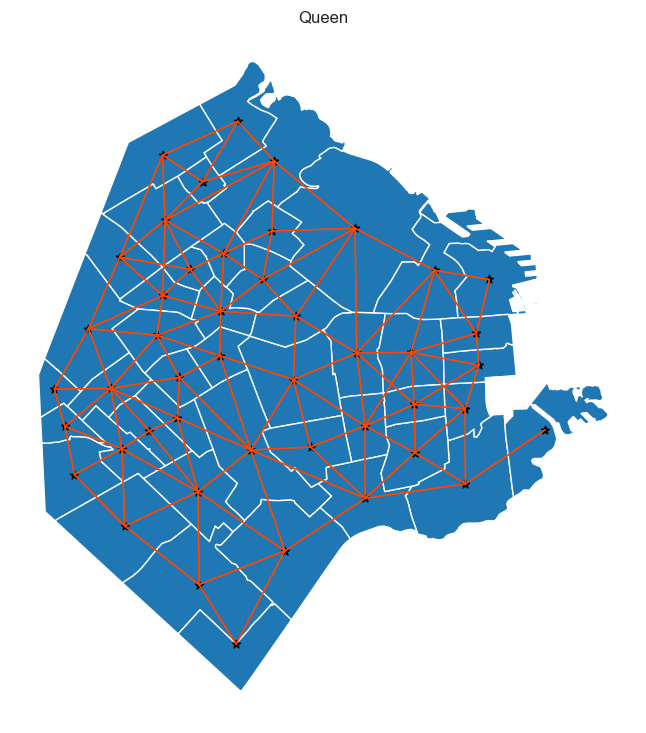

In [124]:
# Set up figure and axis
f, ax = plt.subplots(1, 1, figsize=(9, 9))
# KNN
gdf.plot(ax=ax)
w.plot(
    gdf,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen");

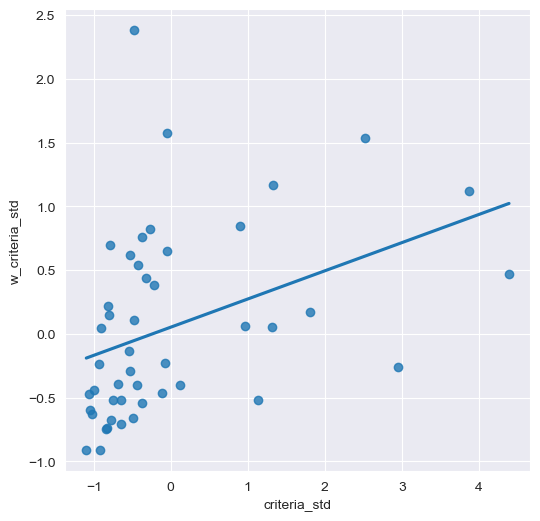

In [125]:
gdf["w_criteria"] = weights.lag_spatial(w, gdf[criteria])

gdf["criteria_std"] = gdf[criteria] - gdf[criteria].mean()
gdf["w_criteria_std"] = weights.lag_spatial(w, gdf["criteria_std"])

# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x="criteria_std", y="w_criteria_std", data=gdf, ci=None
)
plt.show()

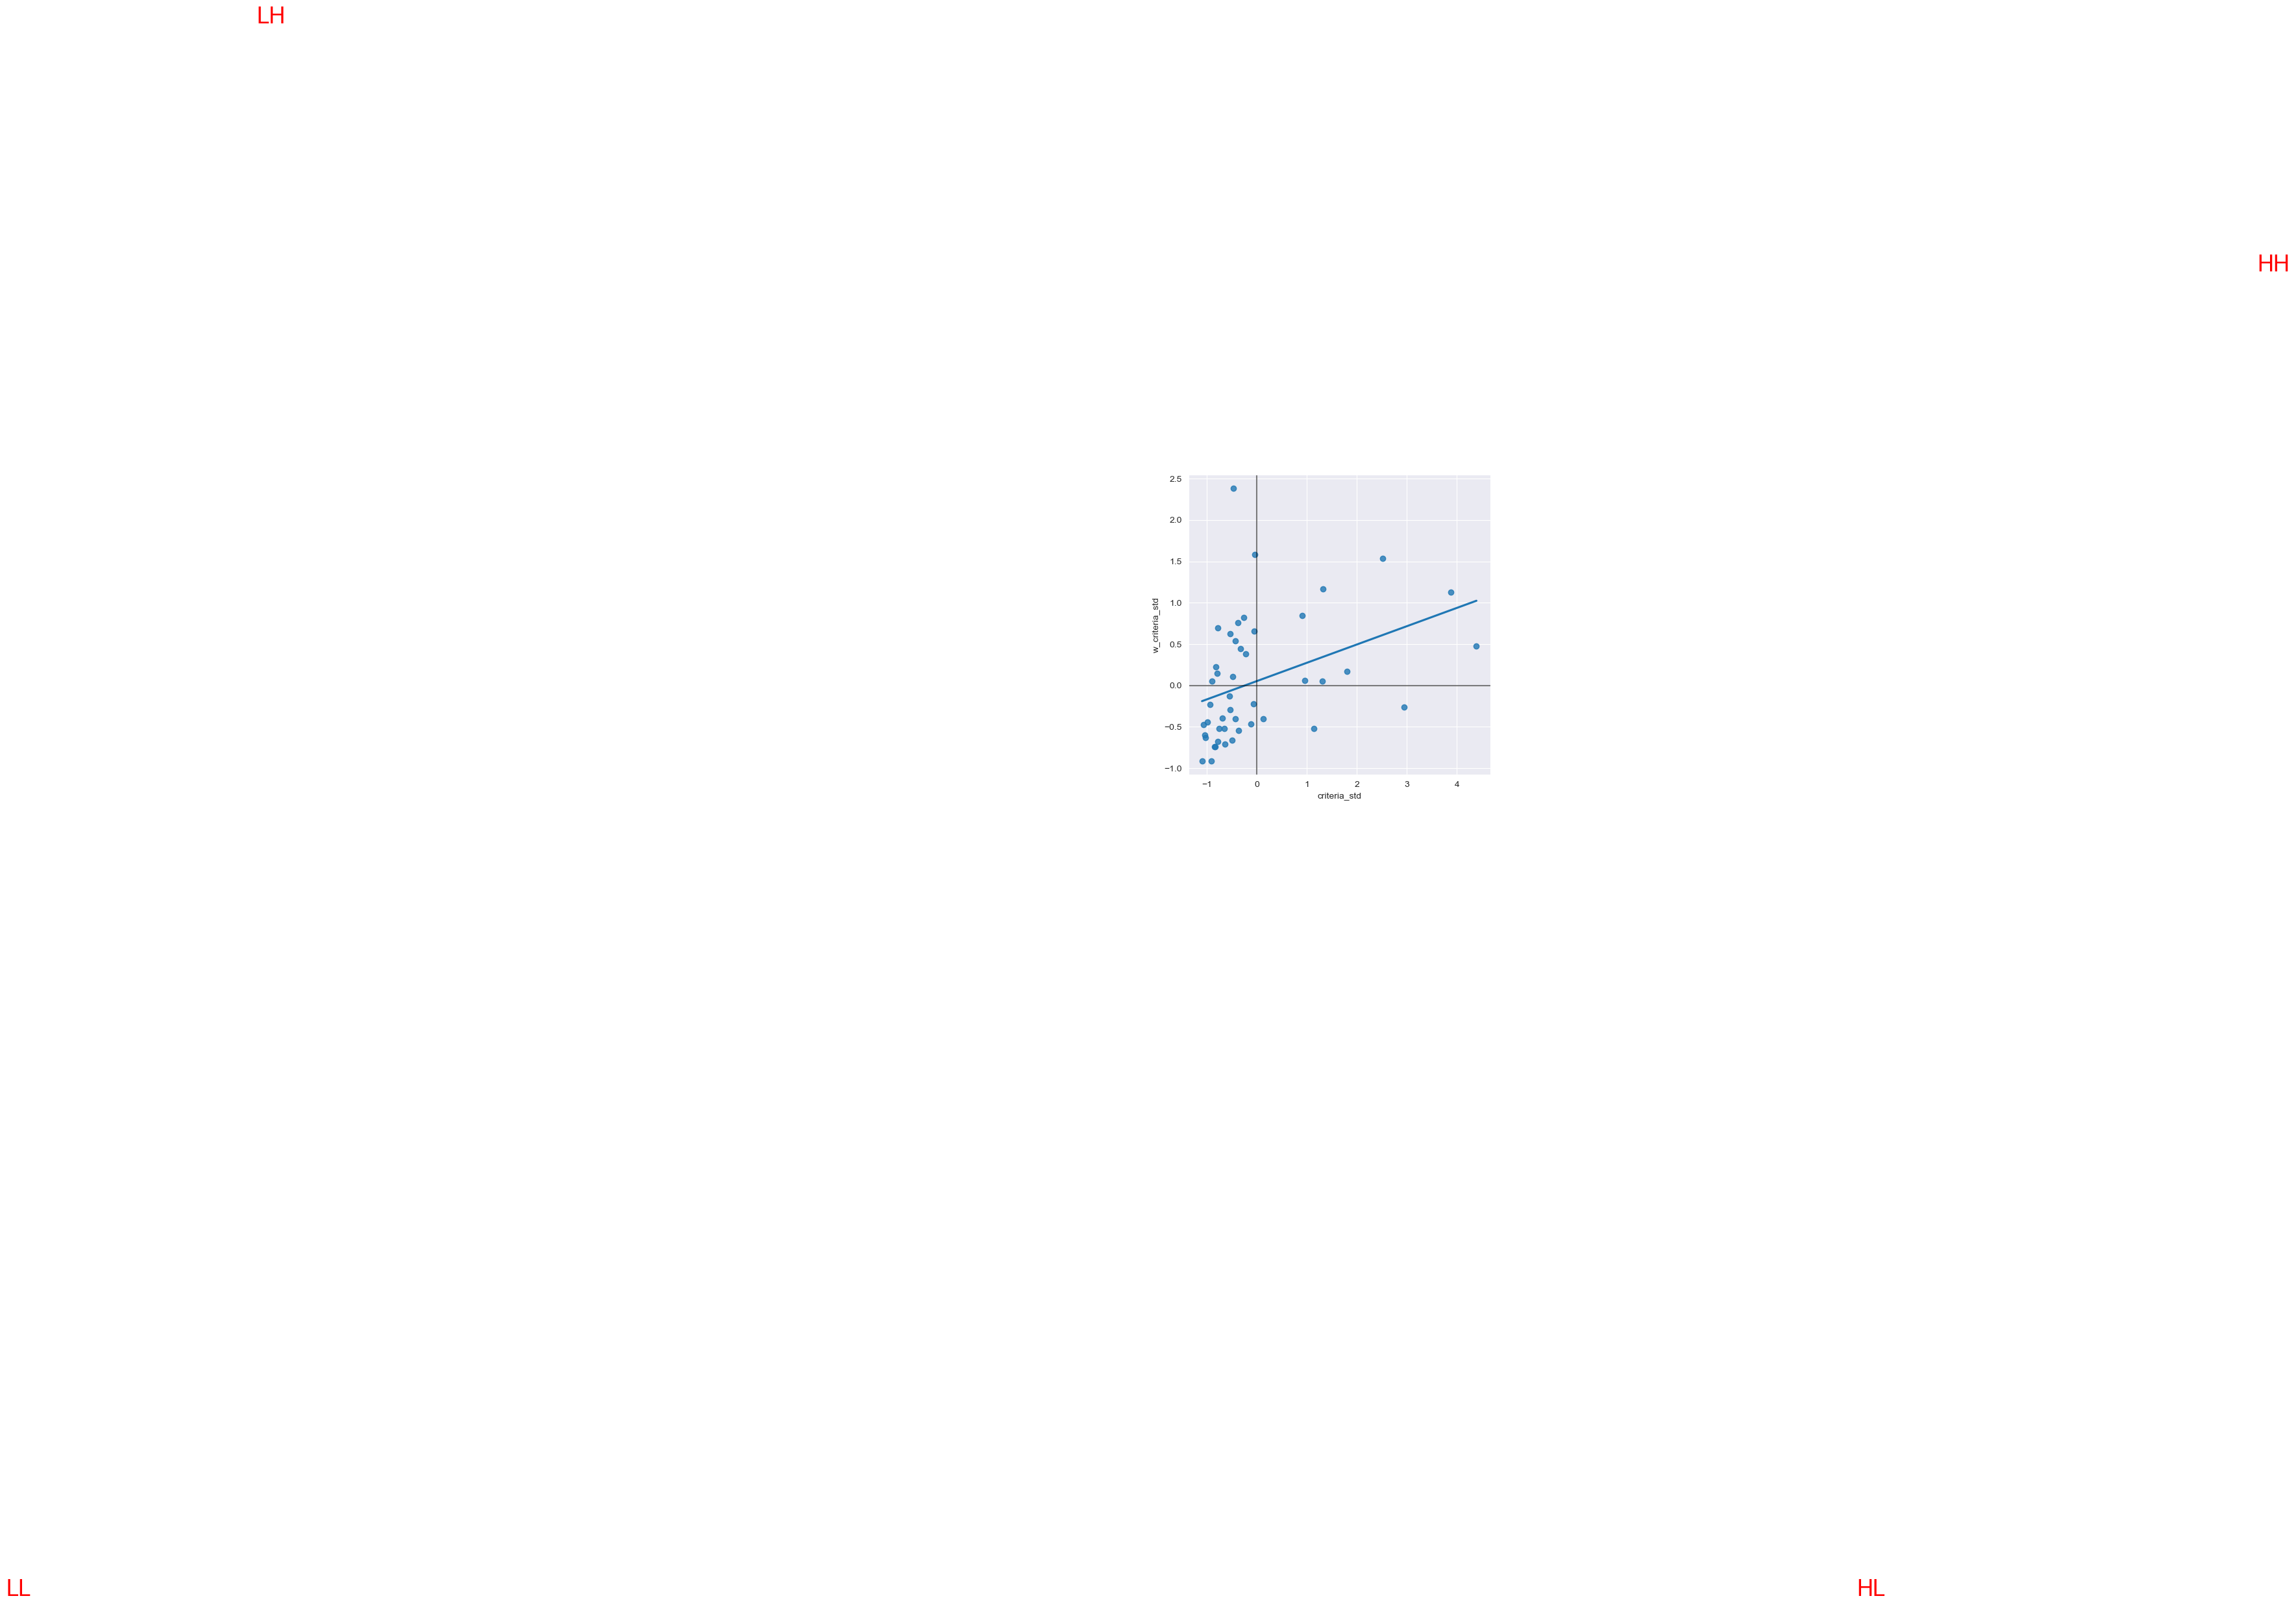

In [126]:
# Set up the figure and axis
f, ax = plt.subplots(1,1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x="criteria_std", y="w_criteria_std", data=gdf, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)
# Add text labels for each quadrant
plt.text(20, 5, "HH", fontsize=25, c="r")
plt.text(12, -11, "HL", fontsize=25, c="r")
plt.text(-20, 8.0, "LH", fontsize=25, c="r")
plt.text(-25, -11.0, "LL", fontsize=25, c="r")
# Display
plt.show()

In [127]:
lisa = esda.moran.Moran_Local(gdf[criteria], w)

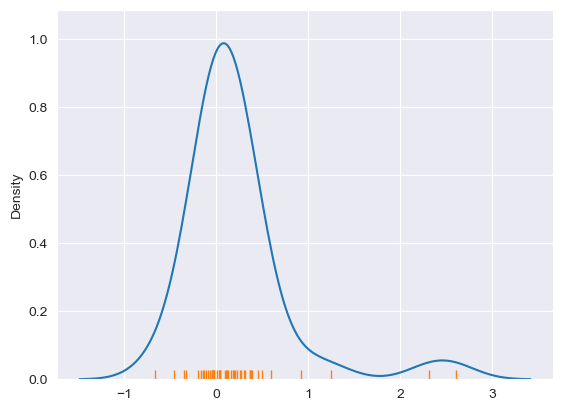

In [128]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

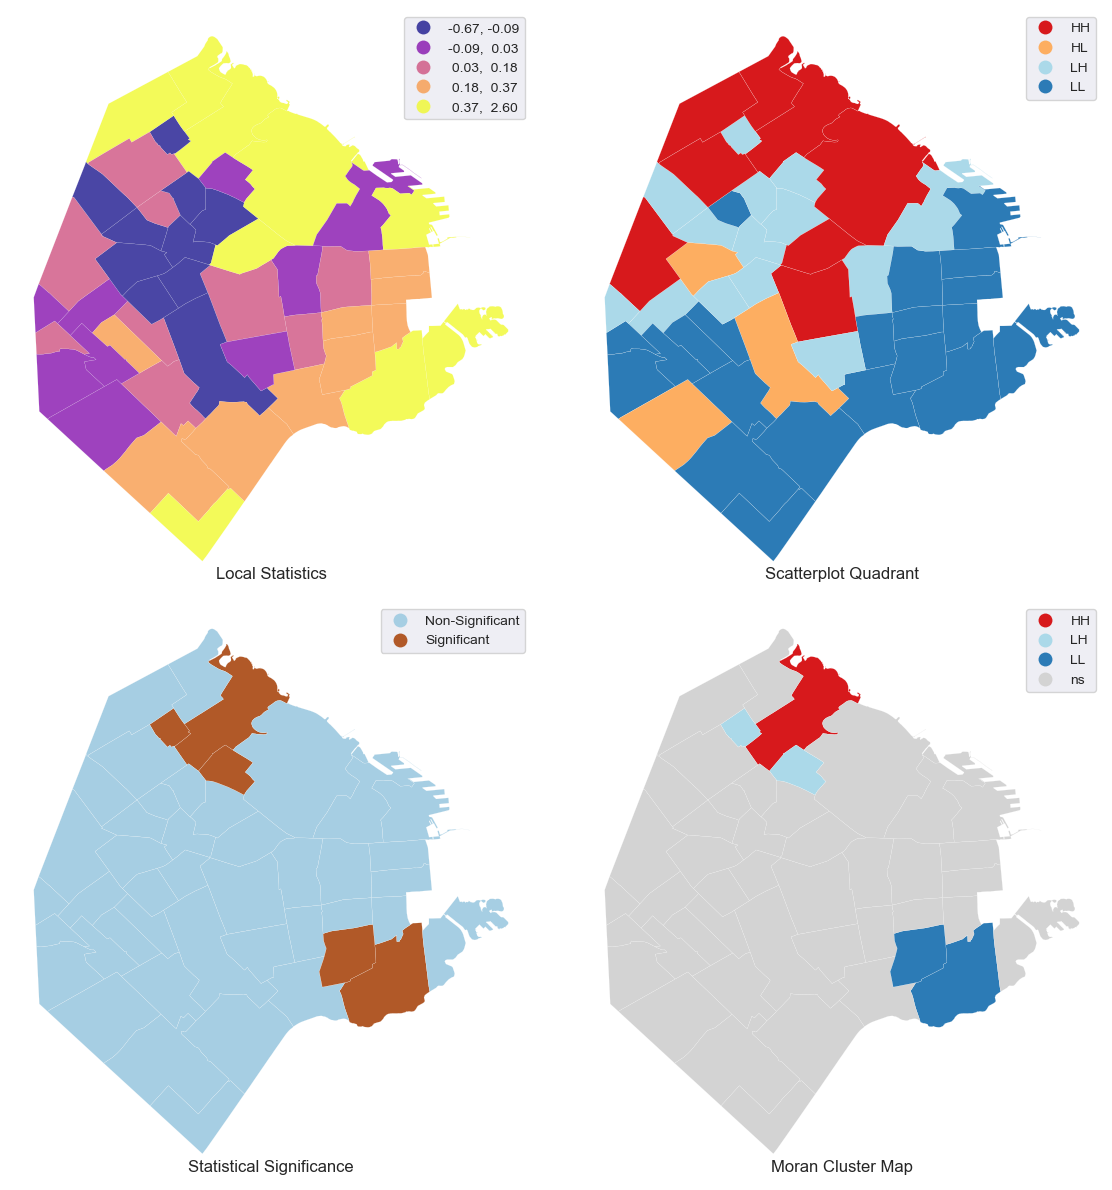

In [129]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
gdf.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quadrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, gdf, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pandas.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=gdf.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
gdf.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, gdf, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()

In [130]:
# Gi
go_i = esda.getisord.G_Local(gdf["SUP_CONST"], w)

# Gi*
go_i_star = esda.getisord.G_Local(gdf["SUP_CONST"], w, star=True)

/Users/santi/miniconda3/lib/python3.10/site-packages/esda/getisord.py:596: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.
  warnings.warn(


In [131]:
def g_map(g, gdf, ax):
    """
    Create a cluster map
    ...

    Arguments
    ---------
    g      : G_Local
             Object from the computation of the G statistic
    gdf     : GeoDataFrame
             Table aligned with values in `g` and containing
             the geometries to plot
    ax     : AxesSubplot
             `matplotlib` axis to draw the map on

    Returns
    -------
    ax     : AxesSubplot
             Axis with the map drawn
    """
    ec = "0.8"

    # Break observations into significant or not
    sig = g.p_sim < 0.05

    # Plot non-significant clusters
    ns = gdf.loc[sig == False, "geometry"]
    ns.plot(ax=ax, color="lightgrey", edgecolor=ec, linewidth=0.1)
    # Plot HH clusters
    hh = gdf.loc[(g.Zs > 0) & (sig == True), "geometry"]
    hh.plot(ax=ax, color="red", edgecolor=ec, linewidth=0.1)
    # Plot LL clusters
    ll = gdf.loc[(g.Zs < 0) & (sig == True), "geometry"]
    ll.plot(ax=ax, color="blue", edgecolor=ec, linewidth=0.1)
    # Style and draw
    contextily.add_basemap(
        ax,
        crs=gdf.crs,
        source=contextily.providers.Stamen.TerrainBackground,
    )
    # Flag to add a star to the title if it's G_i*
    st = ""
    if g.star:
        st = "*"
    # Add title
    ax.set_title(f"G{st} statistic for Pct of Leave votes", size=15)
    # Remove axis for aesthetics
    ax.set_axis_off()
    return ax

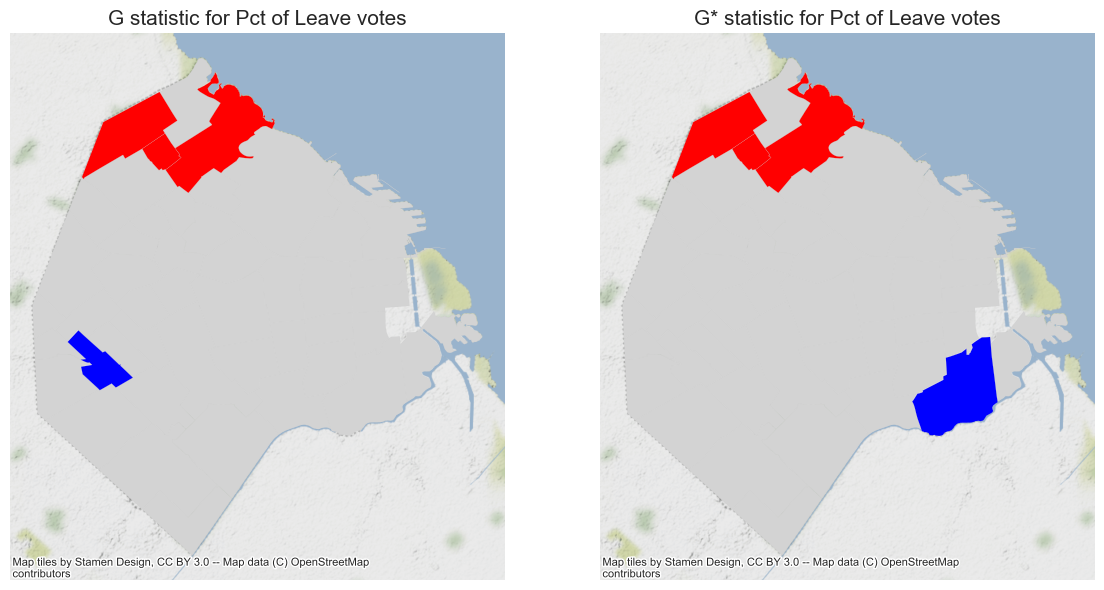

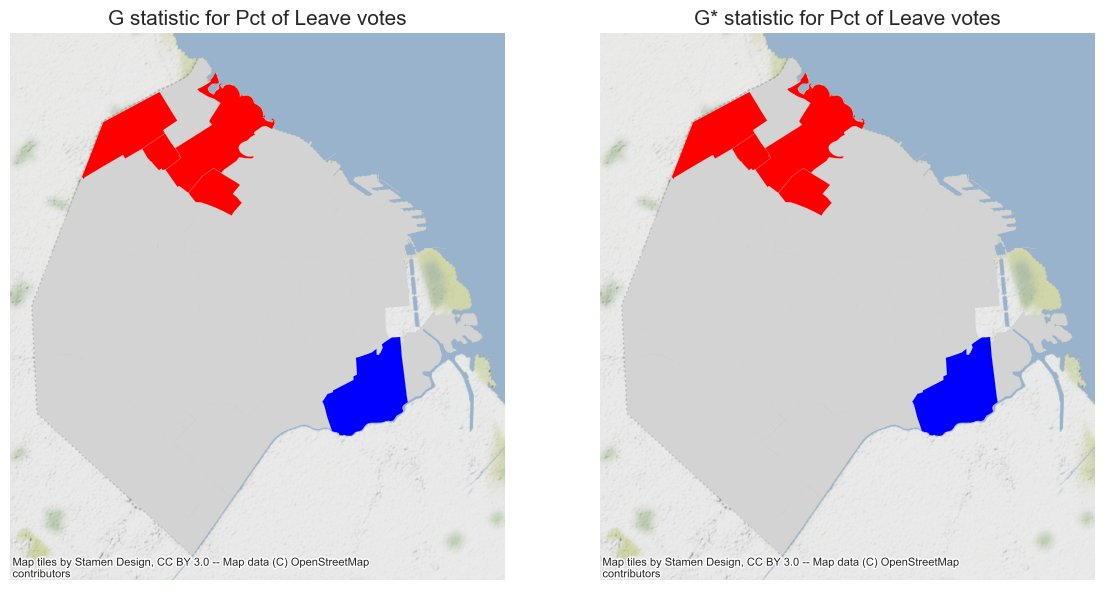

In [132]:
# Set up figure and axes
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# Loop over the two statistics
for g, ax in zip([go_i, go_i_star], axs.flatten()):
    # Generate the statistic's map
    ax = g_map(g, gdf, ax)
# Tight layout to minimise blank spaces
f.tight_layout()
# Render
plt.show()